author: leezeeyee   
date: 2021/3/14   
link: [github](https://github.com/easilylazy/pattern-recognition) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [100]:
import random
import time
class MyTimer():
    def __init__(self):
        self.start = time.time()
    def __enter__(self):
        return self
    def __exit__(self, exc_type, exc_val, exc_tb):
        end = time.time()
        runtime = end - self.start
        msg = 'The function took {time} seconds to complete'
        print(msg.format(time=runtime))

## SSerr
求解最小误差平方和的最佳解（Linear Regression Algorithm），并完成二元分类。
- 函数的输入有：   
    （a）一个N*d维的矩阵X，它的第i行是第i个数据向量；    
    （b）一个N维列向量y，y的第i个元素包含了类（-1，1），并且该类与相应的向量相互对应；   
- 函数的输出为：向量w，返回估计参数向量。


In [2]:
## 直接利用numpy函数pinv()求广义逆
def SSerr(X,y):
    Xt=np.transpose(X)
    Xp=np.linalg.pinv(Xt)
    yt=np.transpose(y)
    return np.dot(yt,Xp)

In [3]:
## 利用ppt定义的广义逆公式求取
def SSerr2(X,y):
    Xt=np.transpose(X)
    Xp=np.dot(np.linalg.inv(np.dot(Xt,X)),Xt)
    return np.dot(Xp,y)

### 用习题中的数据进行验证测试

In [4]:
def loadData():
    """
    载入习题中数据，并转化为numpy的ndarray格式
    Returns:
        X(numpy.ndarray): N个二维数据[N,2]
        Y(numpy.ndarray): N个分类结果[N,] (-1/1)
    """
    dirtyData=[(0.2,0.7),1,
    (0.3,0.3),1,
    (0.4,0.5),1,
    (0.6,0.5),1,
    (0.1,0.4),1,
    (0.4,0.6),-1,
    (0.6,0.2),-1,
    (0.7,0.4),-1,
    (0.8,0.6),-1,
    (0.7,0.5),-1]
    X=[]
    Y=[]
    i=0
    for data in dirtyData:
        #print(data)
        if i%2==0:
            X.append(data)
        else:
            Y.append(data)
        i+=1
    Xnp=np.asarray(X)
    Ynp=np.asarray(Y)
    return Xnp,Ynp

In [5]:
Xnp,Ynp=loadData()
print('SSerr method'+str(SSerr(Xnp,Ynp)))
print('SSerr2 method'+str(SSerr2(Xnp,Ynp)))

SSerr method[-2.35783634  2.23300971]
SSerr2 method[-2.35783634  2.23300971]


In [118]:
## 求梯度
def gradientE(X,y,w):
    Xt=np.transpose(X)
    return (np.dot(np.dot(Xt,X),w)-np.dot(Xt,y))/Xt.shape[0]
## 通过梯度下降求取w
def GD(X,y,results=5,epoch=1000,learning_rate=0.1):
    """
    Args:
        X (numpy.ndarray): 维度[N,d]
        y (numpy.ndarray): 维度[N,]或[N,1]
        results (int):如果没有最优，打印倒数results个数的结果
        epoch (int):最多允许进行的循环次数
    """
    N=X.shape[0]
    d=X.shape[1]
    y=y.reshape([N,1])
    # init w
    w=np.zeros([d,1])
    for i in range(epoch):
        gradient=gradientE(X,y,w)
        if abs(gradient.max())<1e-6:
            print('in {0:d} epoch, achieve optimal w'.format(i))
            break
        w=w-learning_rate*gradient
        if i>epoch-results:
            print('in {0:d} epoch, \nw={1:},\ngradient={2:}'.format(i,w,gradient))
    return w.reshape(d)

In [120]:
Xnp,Ynp=loadData()
GD(Xnp,Ynp)#,epoch=100)

in 374 epoch, achieve optimal w


array([[-2.35783356],
       [ 2.23300668]])

## LMS
编写一个名为LMSalg的函数，用它来实现Widrow-Hoff算法（LMS算法），即用随机梯度下降法获得最佳解。
函数的输入/输出有：
- （a）一个N*d维的矩阵X，它的第i行是第i个数据向量；
- （b）一个N维列向量y，y的第i个元素包含了类（-1，1），并且该类与相应的向量相互对应；
- （c）用向量w_ini初始化参数向量；并且返回估计参数向量。


In [9]:
def LMSalg(X,y,showLen=5):
    '''
    选取部分向量进行梯度下降，即随机梯度下降法
    Args:
        showLen(int):展示的倒数几个结果
    '''
    N=X.shape[0]
    d=X.shape[1]
    y=y.reshape([N,1])
    # init w
    w=np.zeros([d,1])
    # interate
    learning_rate=0.1
    epoch=1000
    for e in range(epoch):
        for i in range(N):
            Xi=X[i].reshape(1,d)
            yi=y[i].reshape(1,1)
            gradient=gradientE(Xi,yi,w)
            w=w-learning_rate*gradient
        if e>epoch-20:
            print(w)

### addBias
为维数为[N,d]的向量X添加偏置向量

In [10]:
def addBias(X):
    '''
    为维数为N,d的向量X添加偏置向量
    Args:
        X(numpy.ndarray):shape为[N,d]
    Returns:
        numpy.ndarray:shape为[N,d+1]，且第一列列向量全为1
    '''
    N=X.shape[0]
    d=X.shape[1]
    bias_vector=np.ones([N,1])
    return np.column_stack((bias_vector,X))

In [11]:
addBias(np.zeros([2,2]))

array([[1., 0., 0.],
       [1., 0., 0.]])

## Test

In [71]:
LMSalg(Xnp,Ynp)

[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]
[[-2.42316689]
 [ 2.17869869]]


In [73]:
GD(addBias(Xnp),Ynp)

[[ 1.43121474]
 [-3.2180209 ]
 [ 0.24135169]]
[[ 1.43121474]
 [-3.2180209 ]
 [ 0.24135169]]
[[ 1.43121474]
 [-3.2180209 ]
 [ 0.24135168]]
[[ 1.43121474]
 [-3.2180209 ]
 [ 0.24135168]]


array([[ 1.43121474],
       [-3.2180209 ],
       [ 0.24135168]])

In [16]:
SSerr(addBias(Xnp),Ynp)

array([ 1.4312148 , -3.21802092,  0.24135157])

In [18]:
W=SSerr2(addBias(Xnp),Ynp)
np.dot(W,np.transpose(addBias(Xnp)))

In [21]:
W=SSerr2((Xnp),Ynp)
np.dot(W,np.transpose((Xnp)))

array([ 1.09153953, -0.03744799,  0.17337032, -0.29819695,  0.65742025,
        0.39667129, -0.96809986, -0.75728155, -0.54646325, -0.53398058])

### GenerateData
根据传入参数mu，d，N生成 **N** 个二维向量的数据集s0 和s1  
- 数据集s0 的样本来自均值向量 $m1=[mu,0]^{T}$ 的正态分布，并且协方差矩阵$S0=I$ 。
- 数据集s1 的样本来自均值向量 $m2=[-mu,0]^{T}$ 的正态分布，并且协方差矩阵$S1=I$ 。
其中 $I$是一个2*2的单位矩阵。


In [248]:
def GenerateData(mu,d,N):
    I=np.eye(d)
    mu0=np.array([mu,0])
    mu1=np.array([-mu,0])

    s0=np.random.multivariate_normal(mu0,I,N)
    s1=np.random.multivariate_normal(mu1,I,N)
    X=np.zeros([2*N,d])
    X[:N]=s0
    X[N:]=s1
    y=np.zeros(2*N)
    y[:N]=1
    y[N:]=-1
    return X,y

In [205]:
X,y=GenerateData(5,2,10)

In [208]:
W=SSerr2(addBias(X),y)
np.dot(addBias(X),W)

array([[ 0.92311005],
       [ 0.65990255],
       [ 1.50487475],
       [ 0.88841951],
       [ 1.16984398],
       [ 0.78697118],
       [ 0.93196528],
       [ 0.96444878],
       [ 0.80239162],
       [ 0.94512756],
       [-0.98626623],
       [-1.24683066],
       [-1.06052521],
       [-1.00862901],
       [-1.21555934],
       [-0.75873434],
       [-0.73465437],
       [-0.92433902],
       [-0.93226398],
       [-0.70925311]])

In [76]:
class Point():
    def __init__(self,x,y):
        self.x=x
        self.y=y
def live_plot(X,y,W,bias,lims=(9,9),clear=True,title=""):
    '''
    清空输出框并绘制二维分类图像
    Args:
        X(numpy.ndarray):分类数据集
        y(numpy.ndarray):分类标签 
        W(numpy.ndarray):分界面法向量
        lims(tuple):lims[0]为x方向的长度，类似lims[1]为y方向
        bias(bool):True 含偏置向量，则取后两位绘图
        clear(bool):True,清空输出框
    '''
    if clear:
            clear_output(wait=True)
    plt.figure(figsize=(7,5))
    scale=2
    if bias:
        try:
            W=W.reshape(3)
            k=-W[1]/W[2]
            b=-W[0]/W[2]
        except Exception as e:
            traceback.print_exc()
    else:
        try:
            W=W.reshape(2)
            k=-W[0]/W[1]
            b=0
        except Exception as e:
            traceback.print_exc()
    P1=Point(scale,k*scale+b)
    P2=Point(-scale,-k*scale+b)
    plt.scatter(X[:,0],X[:,1],c=y.transpose(),marker = 'o', s=20, cmap = plt.cm.Spectral)
    plt.plot([P1.x,P2.x],[P1.y,P2.y],'-')
    plt.xlim((-lims[0], lims[0]))
    plt.ylim((-lims[1], lims[1]))
    plt.title(title)
    
    plt.legend(["separate line","data point"])
    # plt.title(str(wTr))
    # plt.grid(True)
    # plt.xlabel('error'+str(error))
    # plt.ylabel('epoch'+str(epoch))
    plt.show()

### 标注有误的数据
在分类结果中，
- 若y=-1有误，重写为y=-2
- 若y=1有误，重写为y=2

In [235]:
def labelError(w,X,y):
    labelY=np.array(y)
    label={}
    res=np.dot(X,w)
    err=np.multiply(res,y)
    labelY[np.where((err<0)&(labelY==-1))]=-2
    labelY[np.where((err<0)&(labelY==1))]=2
    try:
        label['wrong-1']=sum(labelY==-2)[0]
        label['right-1']=sum(labelY==-1)[0]
        label['right1']=sum(labelY==1)[0]
        label['wrong1']=sum(labelY==2)[0]
    except:
        label['wrong-1']=sum(labelY==-2)
        label['right-1']=sum(labelY==-1)
        label['right1']=sum(labelY==1)
        label['wrong1']=sum(labelY==2)
    return labelY,label

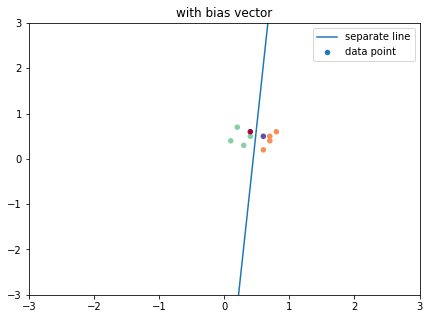

In [236]:
X,Y=loadData()
Xb=addBias(X)
W=SSerr2(Xb,Y)
labelY,_=labelError(W,Xb,Y)
live_plot(X,labelY,W,lims=(3,3),bias=True,clear=False,title="with bias vector")

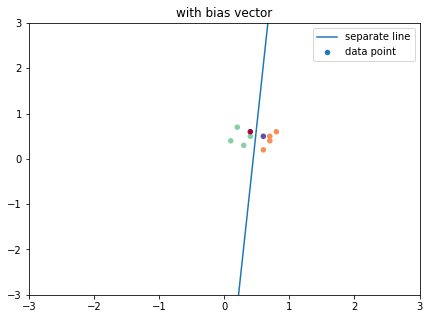

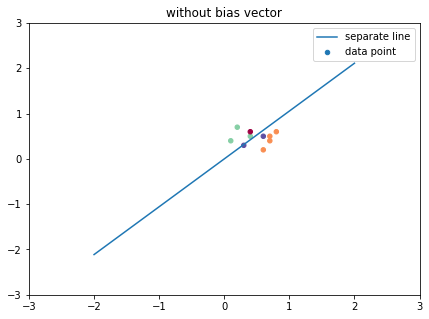

(10,)


In [246]:
X,Y=loadData()
Xb=addBias(X)
W=SSerr2(Xb,Y)
labelY,_=labelError(W,Xb,Y)
live_plot(X,labelY,W,lims=(3,3),bias=True,clear=True,title="with bias vector")
W=SSerr2((X),Y)
labelY,_=labelError(W,X,Y)
live_plot(X,labelY,W,lims=(3,3),bias=False,clear=False,title="without bias vector")
print(labelY.shape)

### 正式结果


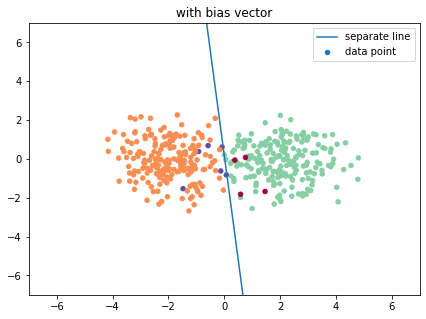

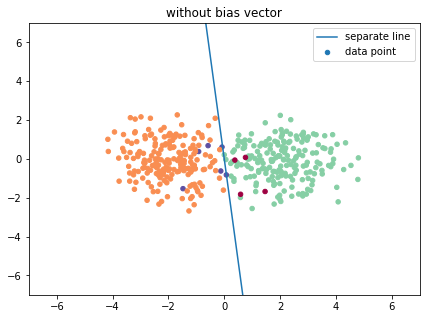

In [250]:
X,Y=GenerateData(mu=2,d=2,N=200)
Xb=addBias(X)
W=SSerr2(Xb,Y)
labelY,_=labelError(W,Xb,Y)
live_plot(X,labelY,W,lims=(7,7),bias=True,clear=False,title="with bias vector")
W=SSerr2(X,Y)
labelY,_=labelError(W,X,Y)

live_plot(X,labelY,W,lims=(7,7),bias=False,clear=False,title="without bias vector")

In [254]:
X,Y=GenerateData(mu=2,d=2,N=200)
Xb=addBias(X)
with MyTimer():
    W=SSerr2(Xb,Y)
labelY,label=labelError(W,Xb,Y)
print(label)
with MyTimWer():
    W=SSerr2(X,Y)
labelY,label=labelError(W,X,Y)
print(label)
print(W.shape)

The function took 0.00099945068359375 seconds to complete
{'wrong-1': 4, 'right-1': 196, 'right1': 193, 'wrong1': 7}
The function took 0.0005471706390380859 seconds to complete
{'wrong-1': 4, 'right-1': 196, 'right1': 194, 'wrong1': 6}
(2,)


in 73 epoch, achieve optimal w
The function took 0.0064961910247802734 seconds to complete
{'wrong-1': 26, 'right-1': 174, 'right1': 164, 'wrong1': 36}


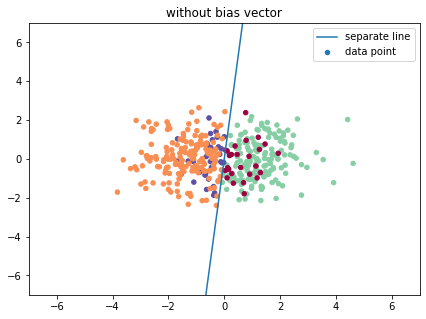

In [265]:
X,Y=GenerateData(mu=1,d=2,N=200)
with MyTimer():
    W=GD(X,Y,epoch=1000,results=10,learning_rate=0.001)
#labelY,label=labelError(W,X,Y)
#print(label)
labelY,label=labelError(W,X,Y)
print(label)
live_plot(X,labelY,W,lims=(7,7),bias=False,clear=False,title="without bias vector")

In [259]:
W.shape

(2, 2)

In [141]:
Y[-10:]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])